In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [2]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v2', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
k_sim1 = m_cii.k_sim
Pk_sim1 = m_cii.Pk_sim

Loading .npz catalogues...


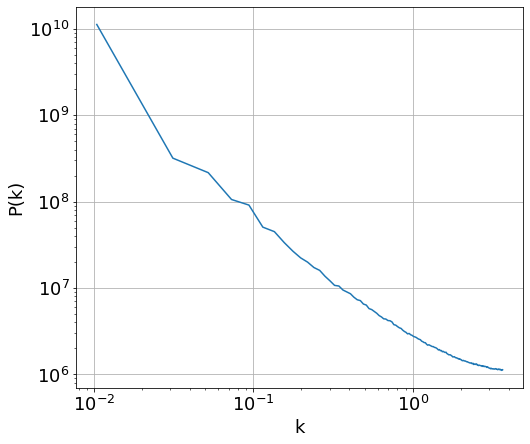

In [4]:
plt.plot(k_sim1, Pk_sim1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.grid()

Generating power spectra average with specific zdex value: 

In [3]:
zdex_spec = 0.8

In [4]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

In [5]:
m_cii_z = lim('Lichen_v3', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [6]:
m_cii_z.update(model_par = {'zdex': zdex_spec,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'})

In [7]:
m_cii_z.model_par

{'zdex': 0.8,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'}

In [8]:
from datetime import datetime

In [ ]:
Pk_sims = [0 for i in range(len(onlyfiles))]

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Beginning time =", current_time)
print("------")

for i in range(len(onlyfiles)):
    m_cii_z.update(catalogue_file = f"{onlyfiles[i]}")
    print('Loading', i, 'th Pk...')
    Pk_sims[i] = m_cii_z.Pk_sim
    print('Finished loading', i, 'th Pk!')
    
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("------")
print("Finished at =", current_time)
np.savetxt('Pk_sims_zdex08.txt', Pk_sims)
print('Ok, entirely done now!')

Beginning time = 14:09:17
------
Loading 0 th Pk...
Loading .npz catalogues...
Finished loading 0 th Pk!
Loading 1 th Pk...
Loading .npz catalogues...
Finished loading 1 th Pk!
Loading 2 th Pk...
Loading .npz catalogues...
Finished loading 2 th Pk!
Loading 3 th Pk...
Loading .npz catalogues...
Finished loading 3 th Pk!
Loading 4 th Pk...
Loading .npz catalogues...
Finished loading 4 th Pk!
Loading 5 th Pk...
Loading .npz catalogues...
Finished loading 5 th Pk!
Loading 6 th Pk...
Loading .npz catalogues...
Finished loading 6 th Pk!
Loading 7 th Pk...
Loading .npz catalogues...
Finished loading 7 th Pk!
Loading 8 th Pk...
Loading .npz catalogues...
Finished loading 8 th Pk!
Loading 9 th Pk...
Loading .npz catalogues...
Finished loading 9 th Pk!
Loading 10 th Pk...
Loading .npz catalogues...
Finished loading 10 th Pk!
Loading 11 th Pk...
Loading .npz catalogues...
Finished loading 11 th Pk!
Loading 12 th Pk...
Loading .npz catalogues...
Finished loading 12 th Pk!
Loading 13 th Pk...
Loadi

Finished loading 110 th Pk!
Loading 111 th Pk...
Loading .npz catalogues...
Finished loading 111 th Pk!
Loading 112 th Pk...
Loading .npz catalogues...
Finished loading 112 th Pk!
Loading 113 th Pk...
Loading .npz catalogues...
Finished loading 113 th Pk!
Loading 114 th Pk...
Loading .npz catalogues...
Finished loading 114 th Pk!
Loading 115 th Pk...
Loading .npz catalogues...
Finished loading 115 th Pk!
Loading 116 th Pk...
Loading .npz catalogues...
Finished loading 116 th Pk!
Loading 117 th Pk...
Loading .npz catalogues...
Finished loading 117 th Pk!
Loading 118 th Pk...
Loading .npz catalogues...
Finished loading 118 th Pk!
Loading 119 th Pk...
Loading .npz catalogues...
Finished loading 119 th Pk!
Loading 120 th Pk...
Loading .npz catalogues...
Finished loading 120 th Pk!
Loading 121 th Pk...
Loading .npz catalogues...
Finished loading 121 th Pk!
Loading 122 th Pk...
Loading .npz catalogues...
Finished loading 122 th Pk!
Loading 123 th Pk...
Loading .npz catalogues...
Finished loa

In [10]:
k_sim = m_cii_z.k_sim

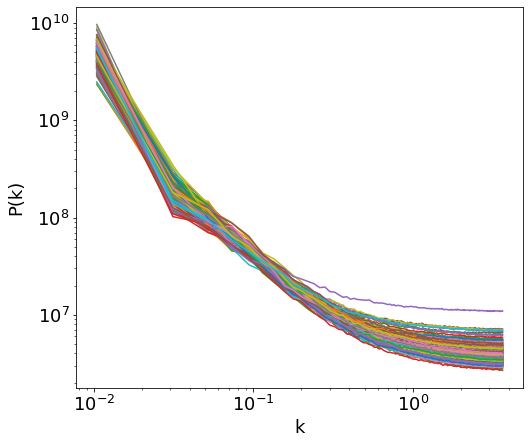

In [11]:
for i in range(len(onlyfiles)):
    plt.plot(k_sim, Pk_sims[i])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.grid()

In [13]:
Pk_trend = np.mean(Pk_sims, axis = 0)
Pk_err = np.std(Pk_sims, axis = 0)

Text(0.5, 1.0, '$Average\\ [C_{II}]\\ Power\\ Spectrum$')

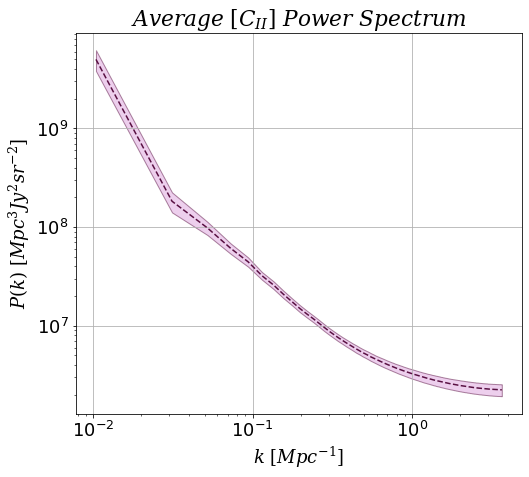

In [14]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

plt.plot(k_sim, Pk_trend, color = '#580F41', linestyle = '--')
plt.fill_between(k_sim.value, Pk_trend - Pk_err, Pk_trend + Pk_err, alpha=0.5, edgecolor='#580F41', facecolor='#DDA0DD')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$k\ [Mpc^{-1}]$')
plt.ylabel(r'$P(k)\ [Mpc^3 Jy^2 sr^{-2}]$')
plt.title(r'$Average\ [C_{II}]\ Power\ Spectrum$')

#plt.savefig('CII_analysis/pspec_many.png', bbox_inches = 'tight')

In [62]:
np.savetxt('k_sims.txt', k_sim_i)
np.savetxt('Pk_sims.txt', Pk_sim_i)

Loading:

In [3]:
b = np.loadtxt('k_sims.txt')
c = np.loadtxt('Pk_sims.txt')

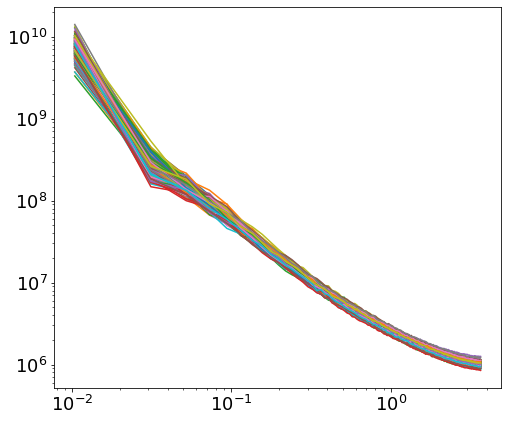

In [4]:
for i in range(len(b)):
    plt.plot(b[i], c[i])
    plt.xscale('log')
    plt.yscale('log')

## With scatter in metallicity:

Checking first if it makes sense

In [3]:
m_cii_z = lim('Lichen_v3', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [27]:
dexs = np.linspace(0.1, 0.5, 10)

In [28]:
pk_kwe = [0 for i in range(len(dexs))]
for i in range(len(dexs)):
    m_cii_z.update(model_par = {'zdex': dexs[i], 'M0':(1.9*(10**9)),'Mmin':(2*(10**10)), 'alpha_MH1':0.74, 'alpha_LCII':0.017, 'BehrooziFile': 'sfr_reinterp.dat'})
    pk_kwe[i] = m_cii_z.Pk_sim
    print('Done with number', i)

Loading .npz catalogues...
Input cosmological model does not match simulations
Done with number 0
Loading .npz catalogues...
Input cosmological model does not match simulations
Done with number 1
Loading .npz catalogues...
Input cosmological model does not match simulations
Done with number 2
Loading .npz catalogues...
Input cosmological model does not match simulations
Done with number 3
Loading .npz catalogues...
Input cosmological model does not match simulations
Done with number 4
Loading .npz catalogues...
Input cosmological model does not match simulations
Done with number 5
Loading .npz catalogues...
Input cosmological model does not match simulations
Done with number 6
Loading .npz catalogues...
Input cosmological model does not match simulations
Done with number 7
Loading .npz catalogues...
Input cosmological model does not match simulations
Done with number 8
Loading .npz catalogues...
Input cosmological model does not match simulations
Done with number 9


In [29]:
k_ex = m_cii_z.k_sim

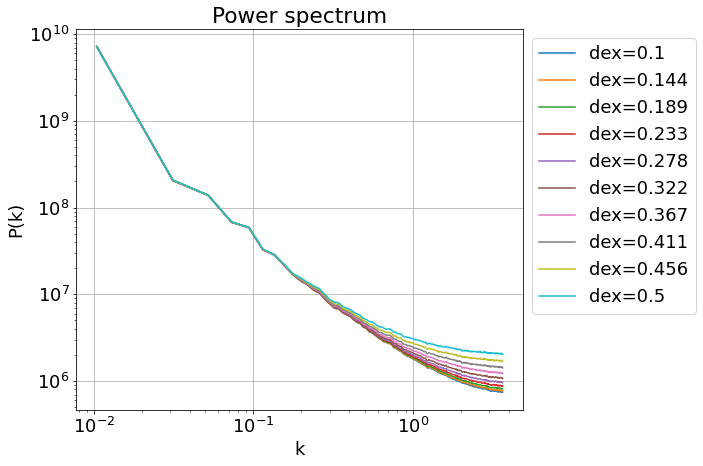

In [31]:
for i in range(len(pk_kwe)):
    #plt.figure(i)
    plt.plot(k_ex, pk_kwe[i], label = 'dex='+str(round(dexs[i], 3)))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.legend(bbox_to_anchor = [1,1])
    plt.title('Power spectrum')
plt.grid()
plt.savefig('CII_analysis/new_dex.png', bbox_inches = 'tight')

In [55]:
np.savetxt('pk_kwe.txt', pk_kwe)

Checking normal usage of add_log_normal_scatter:

In [8]:
def add_log_normal_scatter(data,dex,seed):
    """
    Return array x, randomly scattered by a log-normal distribution with sigma=dexscatter. 
    [via @tonyyli - https://github.com/dongwooc/imapper2]
    Note: scatter maintains mean in linear space (not log space).
    """
    if (dex<=0):
        return data
    # Calculate random scalings
    sigma       = dex * 2.302585 # Stdev in log space (DIFFERENT from stdev in linear space), note: ln(10)=2.302585
    mu          = -0.5*sigma**2

    # Set standard seed so changing minimum mass cut 
    # does not change the high mass halos
    np.random.seed(seed*13579)
    randscaling = np.random.lognormal(mu, sigma, data.shape)
    xscattered  = np.where(data > 0, data*randscaling, data)

    return xscattered

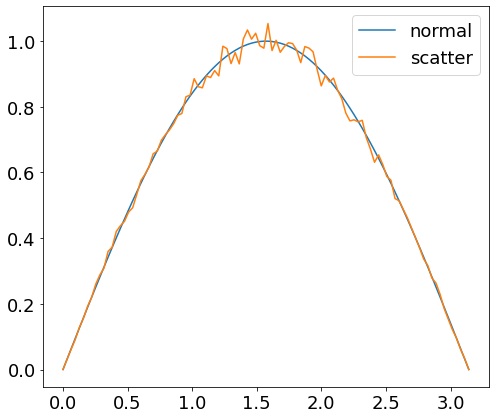

In [9]:
x_ex = np.linspace(0, np.pi, 100)
y_ex = np.sin(x_ex)
y_ex_sc = add_log_normal_scatter(y_ex, 0.01, 23)

plt.plot(x_ex, y_ex, label = 'normal')
plt.plot(x_ex, y_ex_sc, label = 'scatter')
plt.legend()

Running over halo catalogue

In [50]:
np.linspace(0.1, 0.5, 5)

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [53]:
m_cii_z.update(model_par = {'zdex': 0.1,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'})

In [54]:
m_cii_z.model_par

{'zdex': 0.1,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'}

In [55]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

In [57]:
len(onlyfiles)

270

In [59]:
np.savetxt('Pk_sims_zdex01.txt', Pk_sim_i)

In [60]:
k_sim = m_cii_z.k_sim
Pk_sim = Pk_sim_i

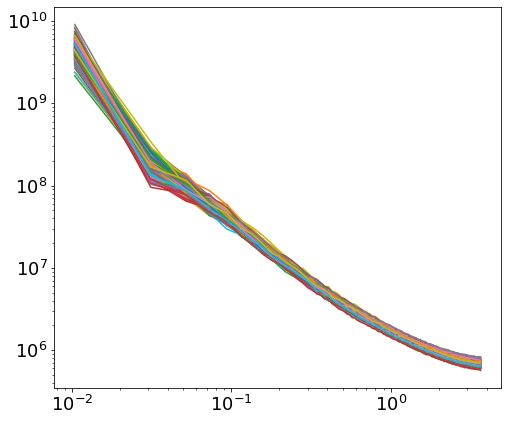

In [61]:
for i in range(len(onlyfiles)):
    plt.plot(k_sim, Pk_sim[i])
    plt.xscale('log')
    plt.yscale('log')

In [62]:
Pk_trend = np.mean(Pk_sim, axis = 0)
Pk_err = np.std(Pk_sim, axis = 0)

Text(0.5, 1.0, '$Average\\ [C_{II}]\\ Power\\ Spectrum$')

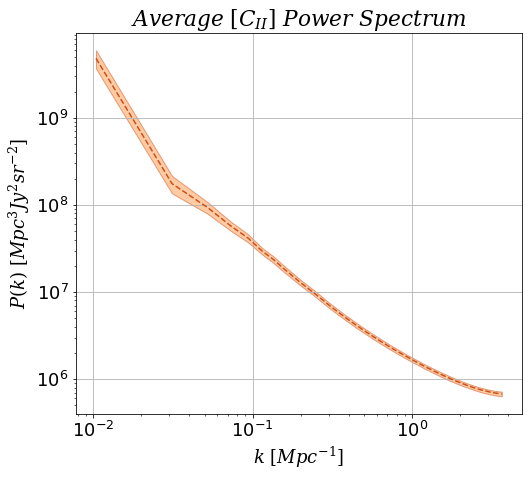

In [65]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

plt.plot(k_sim, Pk_trend, color = '#CC4F1B', linestyle = '--')
plt.fill_between(k_sim.value, Pk_trend - Pk_err, Pk_trend + Pk_err, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$k\ [Mpc^{-1}]$')
plt.ylabel(r'$P(k)\ [Mpc^3 Jy^2 sr^{-2}]$')
plt.title(r'$Average\ [C_{II}]\ Power\ Spectrum$')

#plt.savefig('CII_analysis/pspec_many.png', bbox_inches = 'tight')

Compiling all:

In [15]:
dex00 = np.loadtxt('Pk_sims_zdex00.txt')
dex01 = np.loadtxt('Pk_sims_zdex01.txt')
dex02 = np.loadtxt('Pk_sims_zdex02.txt')
dex03 = np.loadtxt('Pk_sims_zdex03.txt')
dex04 = np.loadtxt('Pk_sims_zdex04.txt')
dex07 = np.loadtxt('Pk_sims_zdex07.txt')
dex10 = np.loadtxt('Pk_sims_zdex10.txt')

In [35]:
Pk_trend_00 = np.median(dex00, axis = 0)
Pk_err_00_up = np.percentile(dex00, 84, axis = 0) - Pk_trend_00 
Pk_err_00_down = Pk_trend_00 - np.percentile(dex00, 16, axis = 0)

Pk_trend_01 = np.median(dex01, axis = 0)
Pk_err_01 = np.std(dex01, axis = 0)

Pk_trend_02 = np.median(dex02, axis = 0)
Pk_err_02 = np.std(dex02, axis = 0)

Pk_trend_03 = np.median(dex03, axis = 0)
Pk_err_03 = np.std(dex03, axis = 0)

Pk_trend_04 = np.median(dex04, axis = 0)
Pk_err_04 = np.std(dex04, axis = 0)

Pk_trend_07 = np.median(dex07, axis = 0)
Pk_err_07_up = np.percentile(dex07, 84, axis = 0) - Pk_trend_07
Pk_err_07_down = Pk_trend_07 - np.percentile(dex07, 16, axis = 0)

Pk_trend_10 = np.median(dex10, axis = 0)
Pk_err_10_up = np.percentile(dex10, 84, axis = 0) - Pk_trend_10
Pk_err_10_down = Pk_trend_10 - np.percentile(dex10, 16, axis = 0)

In [ ]:
008000, 15B01A

Text(0.5, 1.0, '$Average\\ [C_{II}]\\ Power\\ Spectrum$')

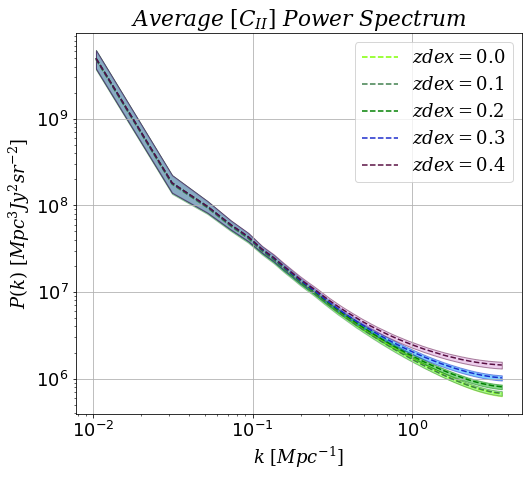

In [33]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

plt.plot(k_sim, Pk_trend_00, color = '#7FFF00', linestyle = '--', label = r'$zdex = 0.0$')
plt.plot(k_sim, Pk_trend_01, color = '#3F7F4C', linestyle = '--', label = r'$zdex = 0.1$')
plt.plot(k_sim, Pk_trend_02, color = '#008000', linestyle = '--', label = r'$zdex = 0.2$')
plt.plot(k_sim, Pk_trend_03, color = '#1B2ACC', linestyle = '--', label = r'$zdex = 0.3$')
plt.plot(k_sim, Pk_trend_04, color = '#580F41', linestyle = '--', label = r'$zdex = 0.4$')
plt.fill_between(k_sim.value, Pk_trend_00 - Pk_err_00, Pk_trend_00 + Pk_err_00, alpha=0.5, edgecolor='#7FFF00', facecolor='#C1F80A')
plt.fill_between(k_sim.value, Pk_trend_01 - Pk_err_01, Pk_trend_01 + Pk_err_01, alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.fill_between(k_sim.value, Pk_trend_02 - Pk_err_02, Pk_trend_02 + Pk_err_02, alpha=0.5, edgecolor='#008000', facecolor='#15B01A')
plt.fill_between(k_sim.value, Pk_trend_03 - Pk_err_03, Pk_trend_03 + Pk_err_03, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.fill_between(k_sim.value, Pk_trend_04 - Pk_err_04, Pk_trend_04 + Pk_err_04, alpha=0.5, edgecolor='#580F41', facecolor='#DDA0DD')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel(r'$k\ [Mpc^{-1}]$')
plt.ylabel(r'$P(k)\ [Mpc^3 Jy^2 sr^{-2}]$')
plt.title(r'$Average\ [C_{II}]\ Power\ Spectrum$')

With better legend:

Text(0.5, 1.0, '$Average\\ [C_{II}]\\ Power\\ Spectrum$')

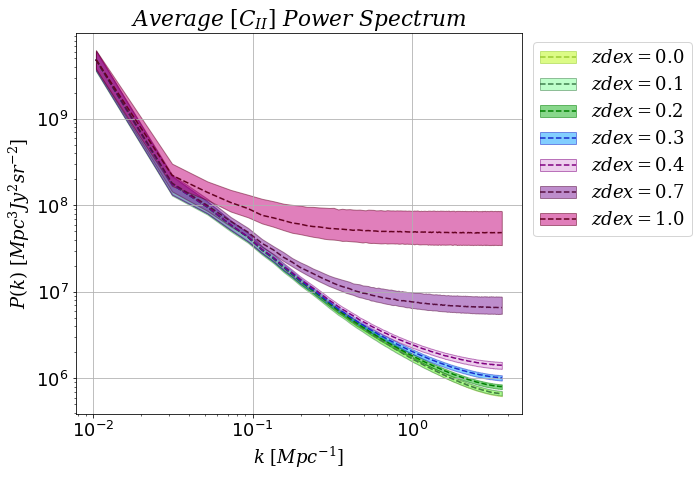

In [36]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

f, a = plt.subplots()

a.fill_between(k_sim.value, Pk_trend_00 - Pk_err_00, Pk_trend_00 + Pk_err_00, alpha=0.5, edgecolor='#9ACD32', facecolor='#BBF90F')
p01 = a.plot(k_sim, Pk_trend_00, color = '#9ACD32', linestyle = '--')
p02 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#9ACD32', facecolor='#BBF90F')


a.fill_between(k_sim.value, Pk_trend_01 - Pk_err_01, Pk_trend_01 + Pk_err_01, alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
p11 = a.plot(k_sim, Pk_trend_00, color = '#3F7F4C', linestyle = '--')
p12 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')

a.fill_between(k_sim.value, Pk_trend_02 - Pk_err_02, Pk_trend_02 + Pk_err_02, alpha=0.5, edgecolor='#008000', facecolor='#15B01A')
p21 = a.plot(k_sim, Pk_trend_02, color = '#008000', linestyle = '--')
p22 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#008000', facecolor='#15B01A')

a.fill_between(k_sim.value, Pk_trend_03 - Pk_err_03, Pk_trend_03 + Pk_err_03, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
p31 = a.plot(k_sim, Pk_trend_03, color = '#1B2ACC', linestyle = '--')
p32 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')

a.fill_between(k_sim.value, Pk_trend_04 - Pk_err_04, Pk_trend_04 + Pk_err_04, alpha=0.5, edgecolor='#800080', facecolor='#DDA0DD')
p41 = a.plot(k_sim, Pk_trend_04, color = '#800080', linestyle = '--')
p42 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#800080', facecolor='#DDA0DD')

a.fill_between(k_sim.value, Pk_trend_07 - Pk_err_07_down, Pk_trend_07 + Pk_err_07_up, alpha=0.5, edgecolor='#580F41', facecolor='#7E1E9C')
p71 = a.plot(k_sim, Pk_trend_07, color = '#580F41', linestyle = '--')
p72 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#580F41', facecolor='#7E1E9C')

a.fill_between(k_sim.value, Pk_trend_10 - Pk_err_10_down, Pk_trend_10 + Pk_err_10_up, alpha=0.5, edgecolor='#650221', facecolor='#C20078')
p101 = a.plot(k_sim, Pk_trend_10, color = '#650221', linestyle = '--')
p102 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#650221', facecolor='#C20078')

a.legend([(p02[0], p01[0]), (p12[0], p11[0]), (p22[0], p21[0]), (p32[0], p31[0]), (p42[0], p41[0]), (p72[0], p71[0]), (p102[0], p101[0]), ], [(r'$zdex = 0.0$'), (r'$zdex = 0.1$'), (r'$zdex = 0.2$'), (r'$zdex = 0.3$'), (r'$zdex = 0.4$'), (r'$zdex = 0.7$'), (r'$zdex = 1.0$') ], bbox_to_anchor = (1.4,1))




plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$k\ [Mpc^{-1}]$')
plt.ylabel(r'$P(k)\ [Mpc^3 Jy^2 sr^{-2}]$')
plt.title(r'$Average\ [C_{II}]\ Power\ Spectrum$')
#plt.savefig('CII_analysis/pspecs_zdexs.png', bbox_inches = 'tight')

In [40]:
signal_zdex10 = m_cii_z.maps

In [42]:
m_cii_z.update(model_par = {'zdex': 0.3,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'})

In [43]:
signal_zdex03 = m_cii_z.maps

Loading .npz catalogues...


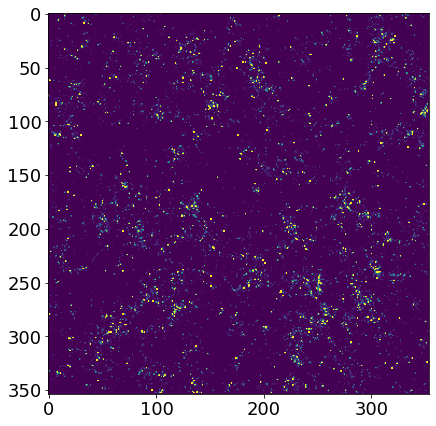

In [44]:
plt.imshow(signal_zdex10[:, :, 3], vmax = 2000)

/tmp/ipykernel_466884/3822043216.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(signal_zdex10[:, :, 3].value))
/tmp/ipykernel_466884/3822043216.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(signal_zdex03[:, :, 3].value))


Text(0.5, 1.0, 'zdex = 0.3')

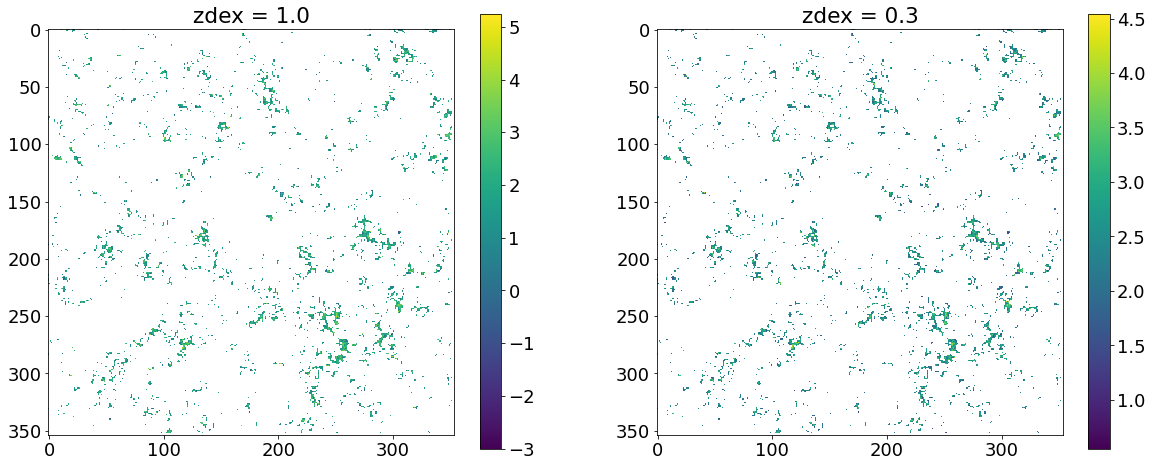

In [56]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

plt.subplot(121)
plt.imshow(np.log10(signal_zdex10[:, :, 3].value))
plt.colorbar()
plt.title('zdex = 1.0')

plt.subplot(122)
plt.imshow(np.log10(signal_zdex03[:, :, 3].value))
plt.colorbar()
plt.title('zdex = 0.3')

In [50]:
np.mean(signal_zdex10)

<Quantity 58.74425619 Jy / sr>

In [51]:
np.mean(signal_zdex03)

<Quantity 57.31845368 Jy / sr>

In [ ]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

f, a = plt.subplots()

a.fill_between(k_sim.value, Pk_trend_00 - Pk_err_00, Pk_trend_00 + Pk_err_00, alpha=0.5, edgecolor='#9ACD32', facecolor='#BBF90F')
p01 = a.plot(k_sim, Pk_trend_00, color = '#9ACD32', linestyle = '--')
p02 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#9ACD32', facecolor='#BBF90F')


a.fill_between(k_sim.value, Pk_trend_01 - Pk_err_01, Pk_trend_01 + Pk_err_01, alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
p11 = a.plot(k_sim, Pk_trend_00, color = '#3F7F4C', linestyle = '--')
p12 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')

a.fill_between(k_sim.value, Pk_trend_02 - Pk_err_02, Pk_trend_02 + Pk_err_02, alpha=0.5, edgecolor='#008000', facecolor='#15B01A')
p21 = a.plot(k_sim, Pk_trend_02, color = '#008000', linestyle = '--')
p22 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#008000', facecolor='#15B01A')

a.fill_between(k_sim.value, Pk_trend_03 - Pk_err_03, Pk_trend_03 + Pk_err_03, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
p31 = a.plot(k_sim, Pk_trend_03, color = '#1B2ACC', linestyle = '--')
p32 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')

a.fill_between(k_sim.value, Pk_trend_04 - Pk_err_04, Pk_trend_04 + Pk_err_04, alpha=0.5, edgecolor='#800080', facecolor='#DDA0DD')
p41 = a.plot(k_sim, Pk_trend_04, color = '#800080', linestyle = '--')
p42 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#800080', facecolor='#DDA0DD')

a.fill_between(k_sim.value, Pk_trend_07 - Pk_err_07, Pk_trend_07 + Pk_err_07, alpha=0.5, edgecolor='#580F41', facecolor='#7E1E9C')
p71 = a.plot(k_sim, Pk_trend_07, color = '#580F41', linestyle = '--')
p72 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#580F41', facecolor='#7E1E9C')

a.fill_between(k_sim.value, Pk_trend_10 - Pk_err_10, Pk_trend_10 + Pk_err_10, alpha=0.5, edgecolor='#9ACD32', facecolor='#C20078')
p101 = a.plot(k_sim, Pk_trend_10, color = '#9ACD32', linestyle = '--')
p102 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#9ACD32', facecolor='#C20078')

a.legend([(p02[0], p01[0]), (p12[0], p11[0]), (p22[0], p21[0]), (p32[0], p31[0]), (p42[0], p41[0]), (p72[0], p71[0]), (p102[0], p101[0]), ], [(r'$zdex = 0.0$'), (r'$zdex = 0.1$'), (r'$zdex = 0.2$'), (r'$zdex = 0.3$'), (r'$zdex = 0.4$'), (r'$zdex = 0.7$'), (r'$zdex = 1.0$') ], bbox_to_anchor = (1.4,1))




plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$k\ [Mpc^{-1}]$')
plt.ylabel(r'$P(k)\ [Mpc^3 Jy^2 sr^{-2}]$')
plt.title(r'$Average\ [C_{II}]\ Power\ Spectrum$')